In [57]:
from dgl import model_zoo
import torch
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from dgl.data.chem.utils import smile2graph
import dgl

In [58]:
model = model_zoo.chem.load_pretrained("GCN_Tox21")
model.eval()
model

Loading pretrained model...


GCNClassifier(
  (gcn_layers): ModuleList(
    (0): GCNLayer(
      (graph_conv): GraphConv(in=74, out=64, normalization=False, activation=<function relu at 0x7efd7f46e158>)
      (dropout): Dropout(p=0.0)
      (res_connection): Linear(in_features=74, out_features=64, bias=True)
      (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): GCNLayer(
      (graph_conv): GraphConv(in=64, out=64, normalization=False, activation=<function relu at 0x7efd7f46e158>)
      (dropout): Dropout(p=0.0)
      (res_connection): Linear(in_features=64, out_features=64, bias=True)
      (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (atom_weighting): Sequential(
    (0): Linear(in_features=64, out_features=1, bias=True)
    (1): Sigmoid()
  )
  (soft_classifier): MLPBinaryClassifier(
    (predict): Sequential(
      (0): Dropout(p=0.0)
      (1): Linear(in_features=128, out_features=64, bias=Tru

In [59]:
tasks = ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase',
         'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE',
         'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

In [60]:
smiles = "CC[NH+](CC)c1ccc(/C=C2\Oc3c(ccc(OCC(N)=O)c3C)C2=O)cc1"

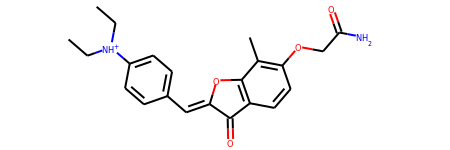

In [61]:
m = Chem.MolFromSmiles(smiles)
m

In [62]:
g = smile2graph(smiles)

In [63]:
g

DGLGraph(num_nodes=28, num_edges=60,
         ndata_schemes={'h': Scheme(shape=(74,), dtype=torch.float32)}
         edata_schemes={})

In [64]:
bg = dgl.batch([g])

In [65]:
bg.ndata['h'].shape

torch.Size([28, 74])

In [66]:
logits = model(bg.ndata['h'], bg)

/home/ubuntu/playground/mz_dgl/python/dgl/base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg, warn_type)


In [67]:
preds = logits.data.numpy() > 0.5

In [68]:
import pandas as pd
pd.DataFrame(preds, columns=tasks)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,False,False,True,False,True,False,True,False,True,False,False,True
